In [1]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
schlev_data = pd.read_csv('./data_sets/us_census/clean_district_data.csv')

In [3]:
schlev_data['TOTALREV'].describe()

count    1.497000e+03
mean     3.478117e+05
std      4.018539e+05
min      6.994600e+04
25%      1.441020e+05
50%      2.218900e+05
75%      3.757050e+05
max      3.359206e+06
Name: TOTALREV, dtype: float64

In [4]:
schlev_data['PCTLTOT'].describe()

count    1497.000000
mean       41.488444
std        16.707048
min         6.800000
25%        29.600000
50%        39.100000
75%        52.100000
max        93.300000
Name: PCTLTOT, dtype: float64

In [5]:
schlev_data['PPCSTOT'].describe()

count     1497.000000
mean     10234.140281
std       2723.682643
min       5195.000000
25%       8486.000000
50%       9498.000000
75%      10928.000000
max      23328.000000
Name: PPCSTOT, dtype: float64

In [6]:
schlev_data['MEAN INCOME'].describe()

count      1497.000000
mean      72098.617234
std       44653.645741
min       17760.000000
25%       54222.000000
50%       64416.000000
75%       78046.000000
max      781796.000000
Name: MEAN INCOME, dtype: float64

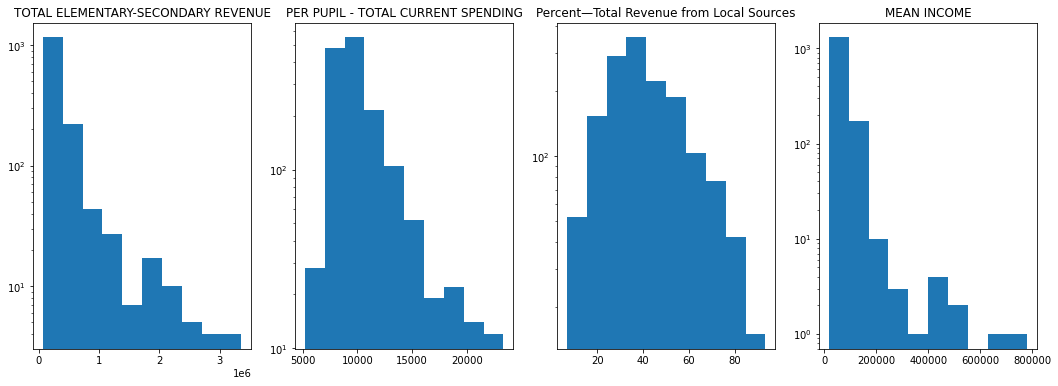

In [7]:
fig, axes = plt.subplots(ncols=4)
axes[0].hist(x=schlev_data['TOTALREV'], log=True)
axes[0].set_title('TOTAL ELEMENTARY-SECONDARY REVENUE')
axes[2].hist(x=schlev_data['PCTLTOT'], log=True)
axes[2].set_title('Percent—Total Revenue from Local Sources')
axes[1].hist(x=schlev_data['PPCSTOT'], log=True)
axes[1].set_title('PER PUPIL - TOTAL CURRENT SPENDING')
axes[3].hist(x=schlev_data['MEAN INCOME'], log=True)
axes[3].set_title('MEAN INCOME')
fig.set_size_inches(18, 6)

In [8]:
schlev_data.groupby('REGION').describe()['TOTALREV']

,count,mean,std,min,25%,50%,75%,max
REGION,,,,,,,,
Midwest,461.0,219769.002169,111331.664744,75340.0,139643.00,185632.0,267937.00,729047.0
Northeast,72.0,319763.944444,200601.410375,104154.0,172630.75,232968.0,533823.50,747268.0
South,718.0,423721.137883,475195.141924,69946.0,143377.00,246452.0,491956.75,2710577.0
West,246.0,374413.662602,491532.577438,86163.0,156318.75,271513.5,394804.75,3359206.0


In [9]:
schlev_data.groupby('REGION').describe()['PPCSTOT']

,count,mean,std,min,25%,50%,75%,max
REGION,,,,,,,,
Midwest,461.0,10796.206074,1706.197511,7374.0,9632.00,10416.0,11640.00,17327.0
Northeast,72.0,17667.861111,3271.937499,12352.0,14780.75,18104.5,20444.75,23328.0
South,718.0,9552.859331,2135.738491,7129.0,8315.25,8893.0,10052.75,21974.0
West,246.0,8993.569106,1908.151729,5195.0,7793.00,8567.0,9963.75,15596.0


In [10]:
schlev_data.groupby('REGION').describe()['PCTLTOT']

,count,mean,std,min,25%,50%,75%,max
REGION,,,,,,,,
Midwest,461.0,41.085683,15.389311,8.2,29.700,37.80,50.600,81.5
Northeast,72.0,40.323611,27.263350,6.8,10.575,41.50,67.550,84.2
South,718.0,44.991643,15.115095,18.6,34.525,42.05,53.500,93.3
West,246.0,32.359350,15.979565,8.7,19.850,28.95,37.275,79.2


In [11]:
schlev_data.groupby('REGION').describe()['MEAN INCOME']

,count,mean,std,min,25%,50%,75%,max
REGION,,,,,,,,
Midwest,461.0,67421.954447,26821.071948,23527.0,51015.00,61208.0,77880.00,157915.0
Northeast,72.0,66188.833333,22804.326102,22871.0,48453.50,65018.0,82116.00,114096.0
South,718.0,73472.306407,51413.146534,20840.0,55656.75,64075.5,75889.75,685559.0
West,246.0,78582.914634,53282.596733,17760.0,60085.50,70714.0,84820.00,781796.0


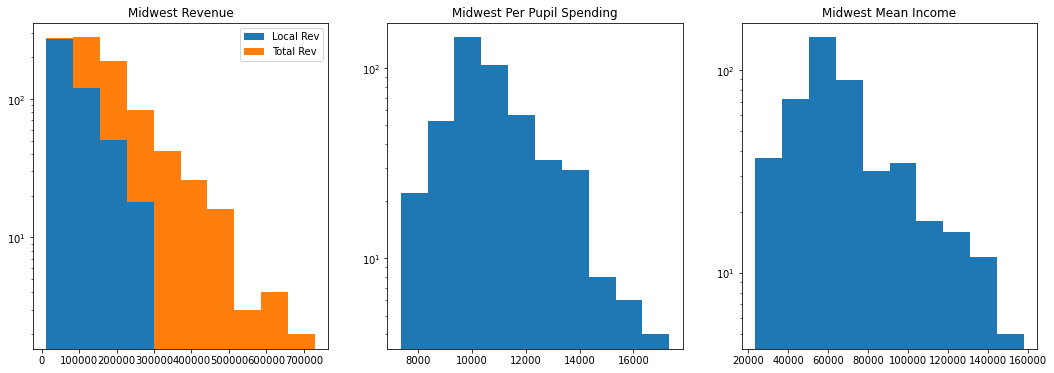

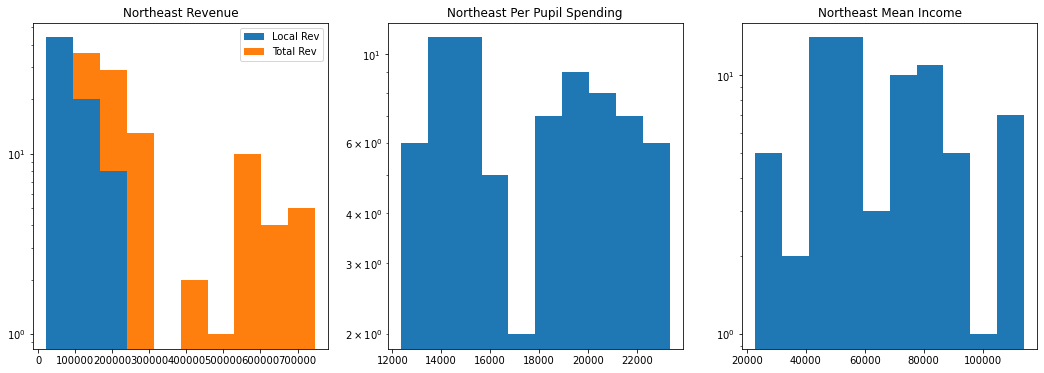

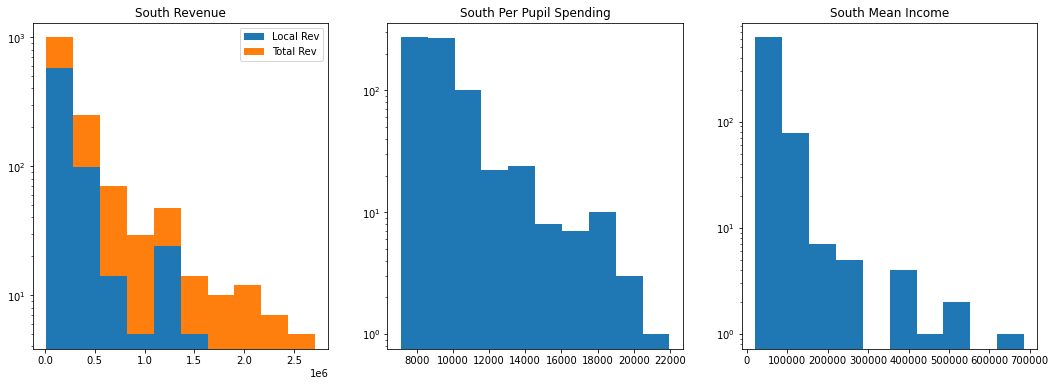

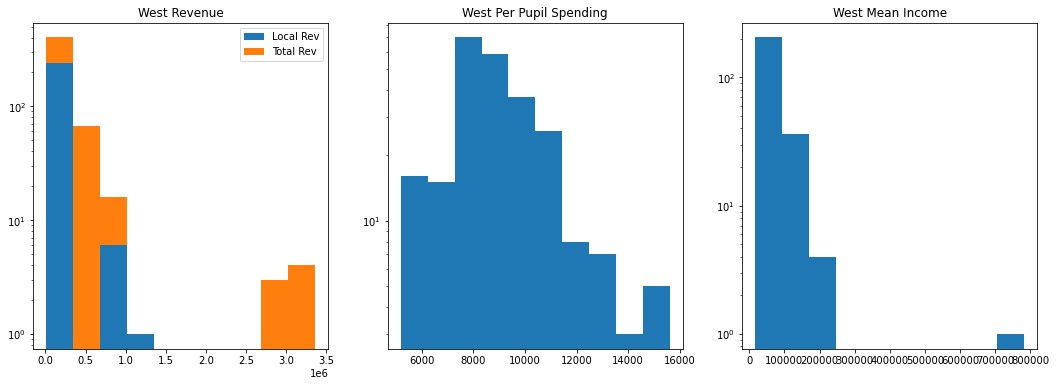

In [12]:
for name, group in schlev_data.groupby(['REGION']):
    fig, axes = plt.subplots(ncols=3)
    axes[0].hist(x=[group['TLOCREV'], group['TOTALREV']], log=True, stacked=True)
    axes[0].legend(['Local Rev', 'Total Rev'])
    axes[0].set_title(f'{name} Revenue')
    axes[1].hist(x=group['PPCSTOT'], log=True)
    axes[1].set_title(f'{name} Per Pupil Spending')
    axes[2].hist(x=group['MEAN INCOME'], log=True)
    axes[2].set_title(f'{name} Mean Income')
    fig.set_size_inches(18, 6)

In [13]:
schlev_data.groupby('DIVISION').describe()['TOTALREV']

,count,mean,std,min,25%,50%,75%,max
DIVISION,,,,,,,,
East North Central,352.0,214171.250000,101786.889240,75340.0,138585.25,185300.5,263213.00,729047.0
East South Central,133.0,242520.699248,198579.933107,82192.0,124808.00,180014.0,281434.00,1272594.0
Middle Atlantic,72.0,319763.944444,200601.410375,104154.0,172630.75,232968.0,533823.50,747268.0
Mountain,62.0,622308.774194,900829.537574,99323.0,147495.00,310804.5,546980.75,3359206.0
Pacific,184.0,290883.788043,158512.325495,86163.0,166882.00,253761.5,365781.75,815978.0
South Atlantic,489.0,497946.122699,547684.153192,69946.0,135980.00,266079.0,587566.00,2710577.0
West North Central,109.0,237846.146789,136706.316135,75706.0,140602.00,188700.0,297081.00,666255.0
West South Central,96.0,296675.729167,134198.770826,142420.0,204447.50,241862.0,373153.25,625708.0


In [14]:
schlev_data.groupby('DIVISION').describe()['PCTLTOT']

,count,mean,std,min,25%,50%,75%,max
DIVISION,,,,,,,,
East North Central,352.0,40.762216,16.080393,8.2,29.250,36.55,49.450,81.5
East South Central,133.0,39.492481,10.177996,22.1,30.200,38.60,48.300,59.3
Middle Atlantic,72.0,40.323611,27.263350,6.8,10.575,41.50,67.550,84.2
Mountain,62.0,29.838710,10.774490,8.7,21.850,29.35,34.275,53.7
Pacific,184.0,33.208696,17.328672,12.5,19.175,28.60,38.900,79.2
South Atlantic,489.0,47.168303,16.227049,18.6,36.400,43.10,56.100,93.3
West North Central,109.0,42.130275,12.918975,13.6,32.100,41.40,51.900,67.0
West South Central,96.0,41.522917,12.201566,21.4,32.225,41.80,48.200,74.6


In [15]:
schlev_data.groupby('DIVISION').describe()['PPCSTOT']

,count,mean,std,min,25%,50%,75%,max
DIVISION,,,,,,,,
East North Central,352.0,11015.306818,1834.783401,7374.0,9687.50,10652.0,12102.75,17327.0
East South Central,133.0,8972.383459,964.950727,7129.0,8263.00,8822.0,9610.00,11147.0
Middle Atlantic,72.0,17667.861111,3271.937499,12352.0,14780.75,18104.5,20444.75,23328.0
Mountain,62.0,7485.596774,1340.608113,5195.0,6235.50,7380.0,8456.50,10653.0
Pacific,184.0,9501.690217,1801.534394,7159.0,8208.25,8996.5,10431.25,15596.0
South Atlantic,489.0,9545.044990,2412.638795,7485.0,8232.00,8723.0,9403.00,21974.0
West North Central,109.0,10088.651376,892.492996,7525.0,9573.00,10133.0,10645.00,12601.0
West South Central,96.0,10396.864583,1428.310910,8453.0,9535.00,10176.5,10890.00,17588.0


In [16]:
schlev_data.groupby('DIVISION').describe()['MEAN INCOME']

,count,mean,std,min,25%,50%,75%,max
DIVISION,,,,,,,,
East North Central,352.0,66949.903409,27003.830779,23527.0,50569.25,59566.0,77373.25,151262.0
East South Central,133.0,68116.639098,27384.033661,20840.0,55569.00,64013.0,76857.00,279092.0
Middle Atlantic,72.0,66188.833333,22804.326102,22871.0,48453.50,65018.0,82116.00,114096.0
Mountain,62.0,82642.709677,93088.592932,20292.0,63185.25,69775.5,75415.25,781796.0
Pacific,184.0,77214.940217,30082.104384,17760.0,60054.75,71544.0,89060.50,194371.0
South Atlantic,489.0,76772.089980,59877.332315,24335.0,55506.00,64904.0,76992.00,685559.0
West North Central,109.0,68946.376147,26286.667976,23692.0,53771.00,63781.0,79673.00,157915.0
West South Central,96.0,64083.864583,17485.204061,26345.0,57841.75,61649.5,66594.25,168031.0


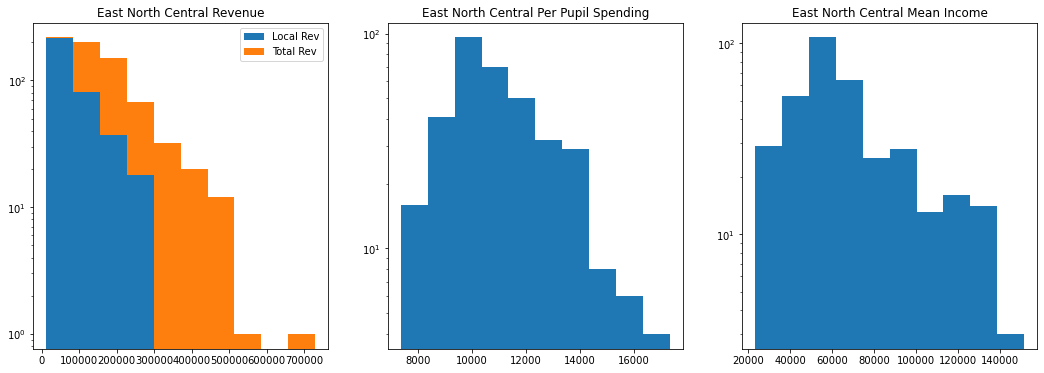

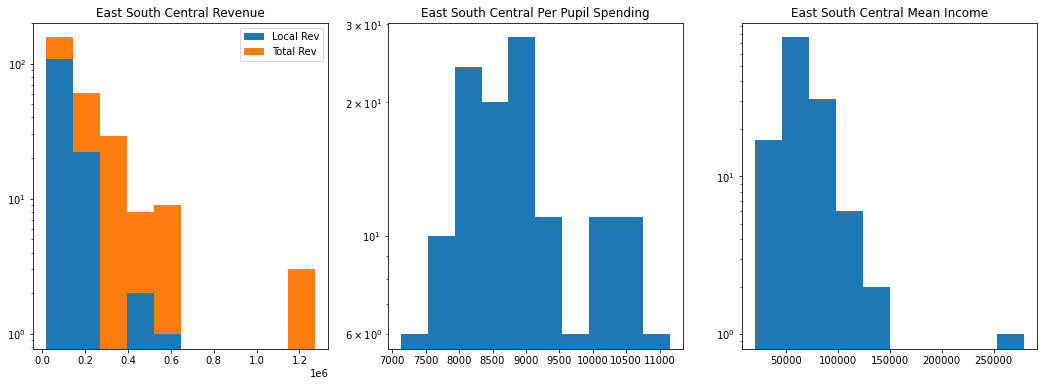

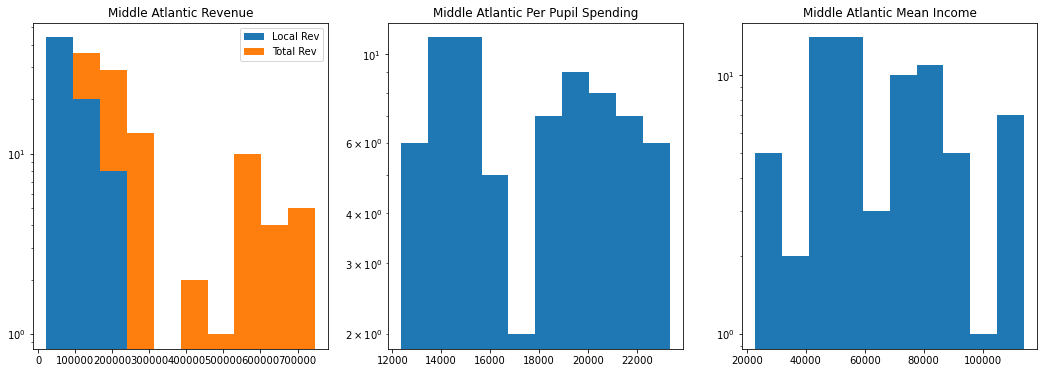

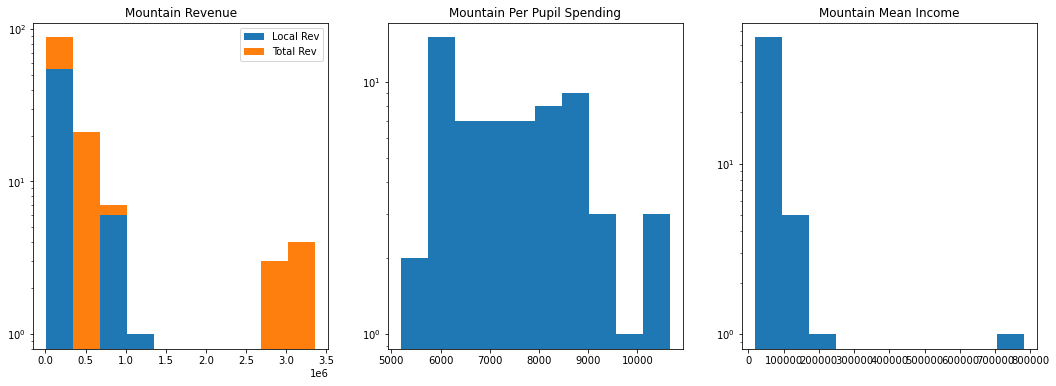

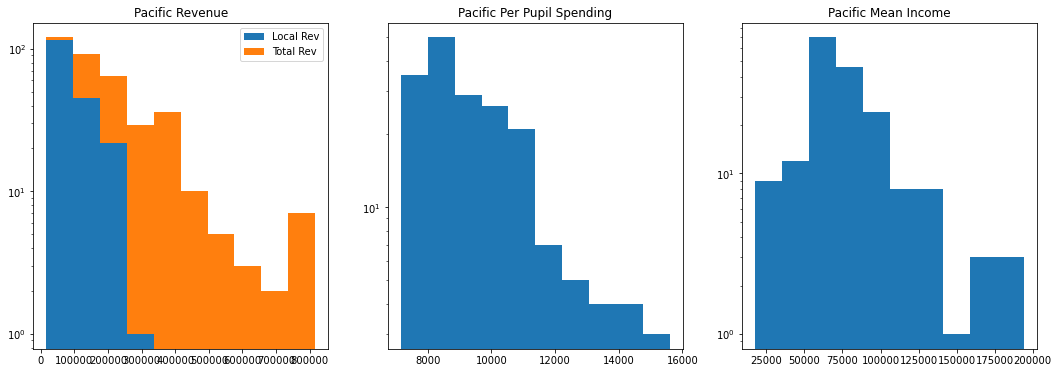

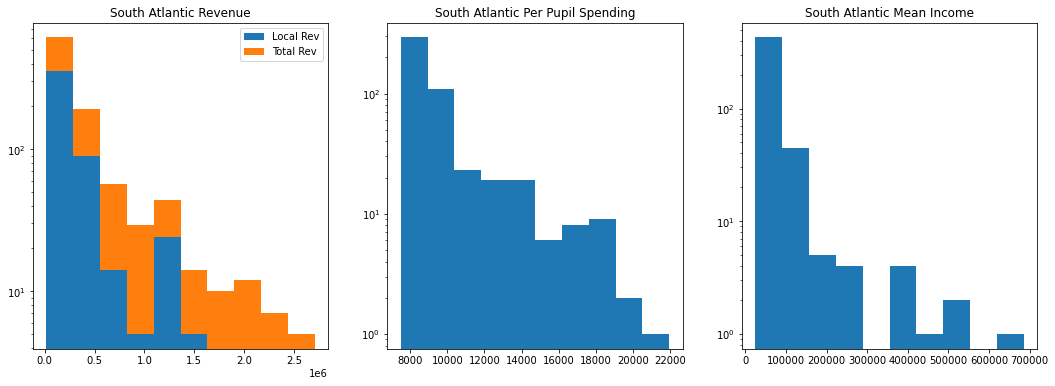

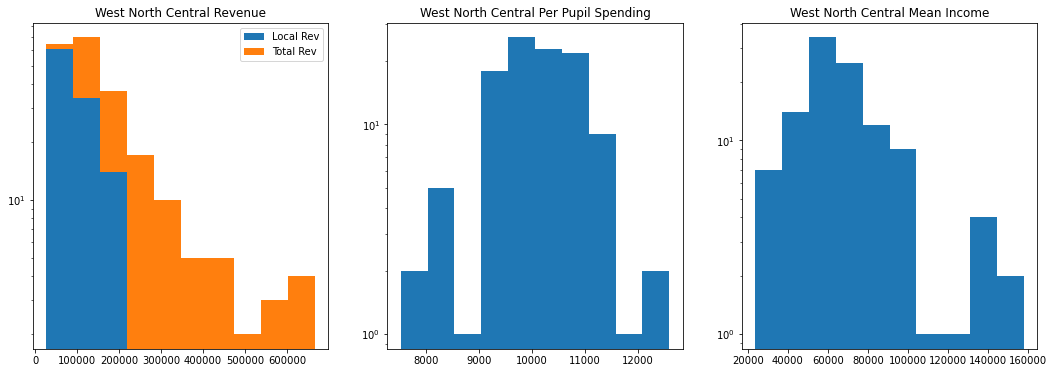

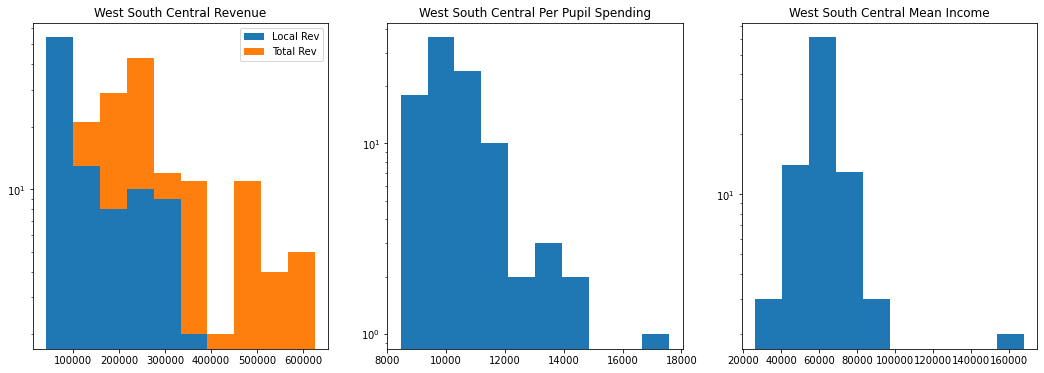

In [17]:
for name, group in schlev_data.groupby(['DIVISION']):
    fig, axes = plt.subplots(ncols=3)
    axes[0].hist(x=[group['TLOCREV'], group['TOTALREV']], log=True, stacked=True)
    axes[0].legend(['Local Rev', 'Total Rev'])
    axes[0].set_title(f'{name} Revenue')
    axes[1].hist(x=group['PPCSTOT'], log=True)
    axes[1].set_title(f'{name} Per Pupil Spending')
    axes[2].hist(x=group['MEAN INCOME'], log=True)
    axes[2].set_title(f'{name} Mean Income')
    fig.set_size_inches(18, 6)

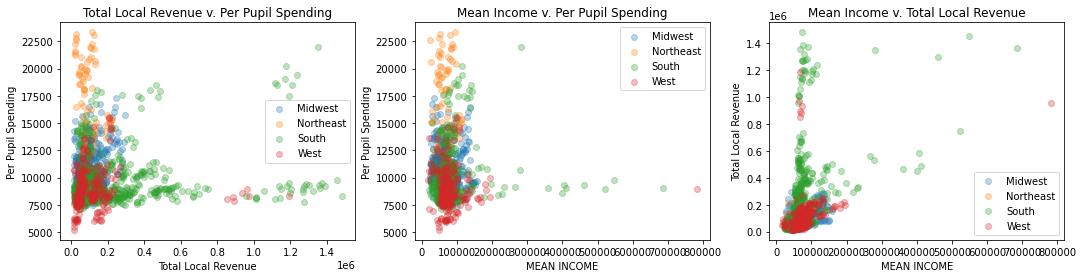

In [18]:
region_data = schlev_data.groupby(['REGION'])
fig, axes = plt.subplots(ncols=3)
fig.set_size_inches(18, 4)
for name, group in region_data:
    axes[0].scatter(x='TLOCREV', y='PPCSTOT', data=group, label=name, alpha=0.3)
    axes[0].set_xlabel('Total Local Revenue')
    axes[0].set_ylabel('Per Pupil Spending')
    axes[0].set_title('Total Local Revenue v. Per Pupil Spending')
    axes[0].legend()
    axes[1].scatter(x='MEAN INCOME', y='PPCSTOT', data=group, label=name, alpha=0.3)
    axes[1].set_xlabel('MEAN INCOME')
    axes[1].set_ylabel('Per Pupil Spending')
    axes[1].set_title('Mean Income v. Per Pupil Spending')
    axes[1].legend()
    axes[2].scatter(x='MEAN INCOME', y='TLOCREV', data=group, label=name, alpha=0.3)
    axes[2].set_xlabel('MEAN INCOME')
    axes[2].set_ylabel('Total Local Revenue')
    axes[2].set_title('Mean Income v. Total Local Revenue')
    axes[2].legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


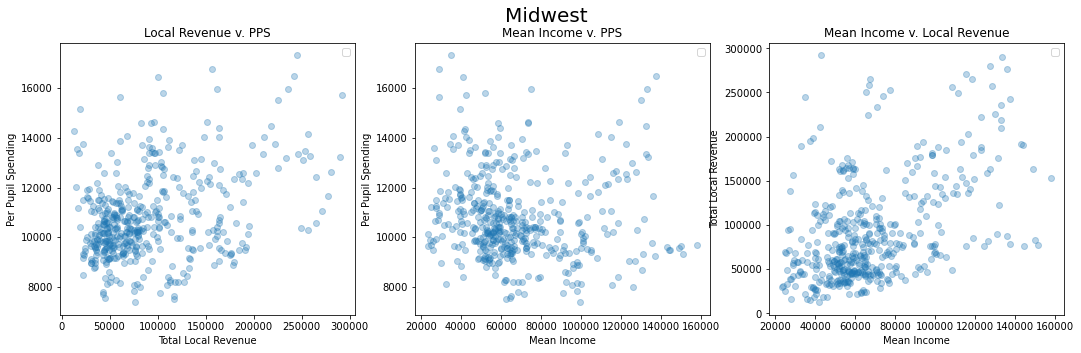

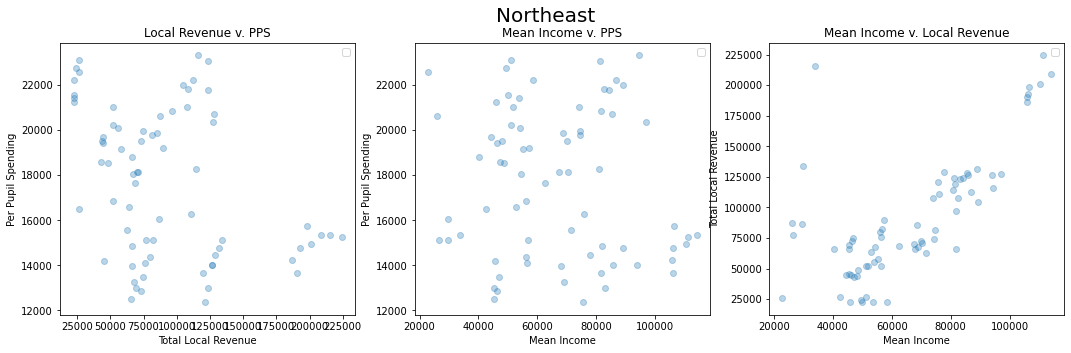

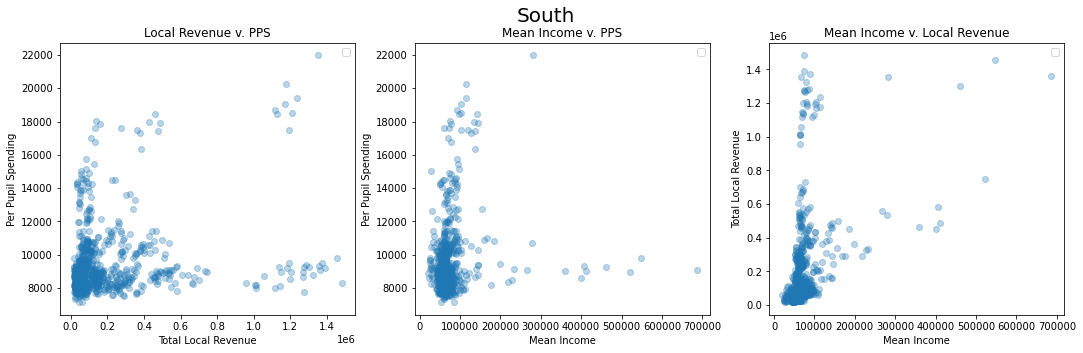

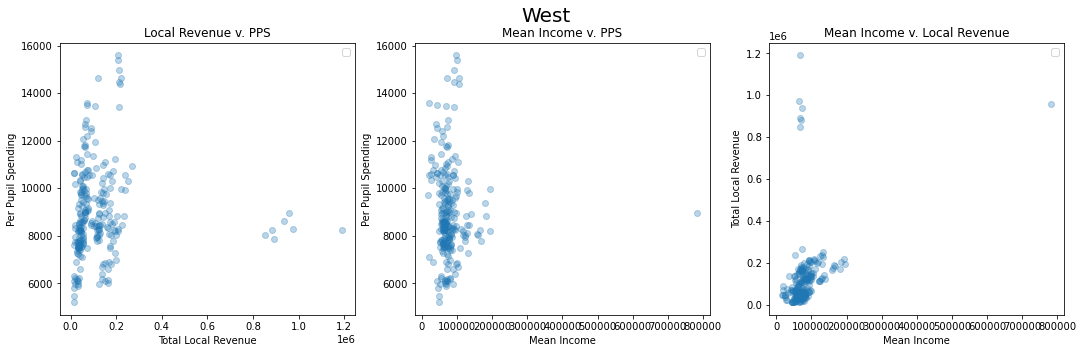

In [19]:
for name, group in region_data:
    fig, axes = plt.subplots(ncols=3, nrows=1)
    fig.set_size_inches(18, 5)
    fig.suptitle(name, fontsize=20)
    axes[0].scatter(x=group['TLOCREV'], y=group['PPCSTOT'], alpha=0.3)
    axes[0].set_xlabel('Total Local Revenue')
    axes[0].set_ylabel('Per Pupil Spending')
    axes[0].set_title('Local Revenue v. PPS')
    axes[0].legend()

    axes[1].scatter(x=group['MEAN INCOME'], y=group['PPCSTOT'], alpha=0.3)
    axes[1].set_xlabel('Mean Income')
    axes[1].set_ylabel('Per Pupil Spending')
    axes[1].set_title('Mean Income v. PPS')
    axes[1].legend()

    axes[2].scatter(x=group['MEAN INCOME'], y=group['TLOCREV'], alpha=0.3)
    axes[2].set_xlabel('Mean Income')
    axes[2].set_ylabel('Total Local Revenue')
    axes[2].set_title('Mean Income v. Local Revenue')
    axes[2].legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

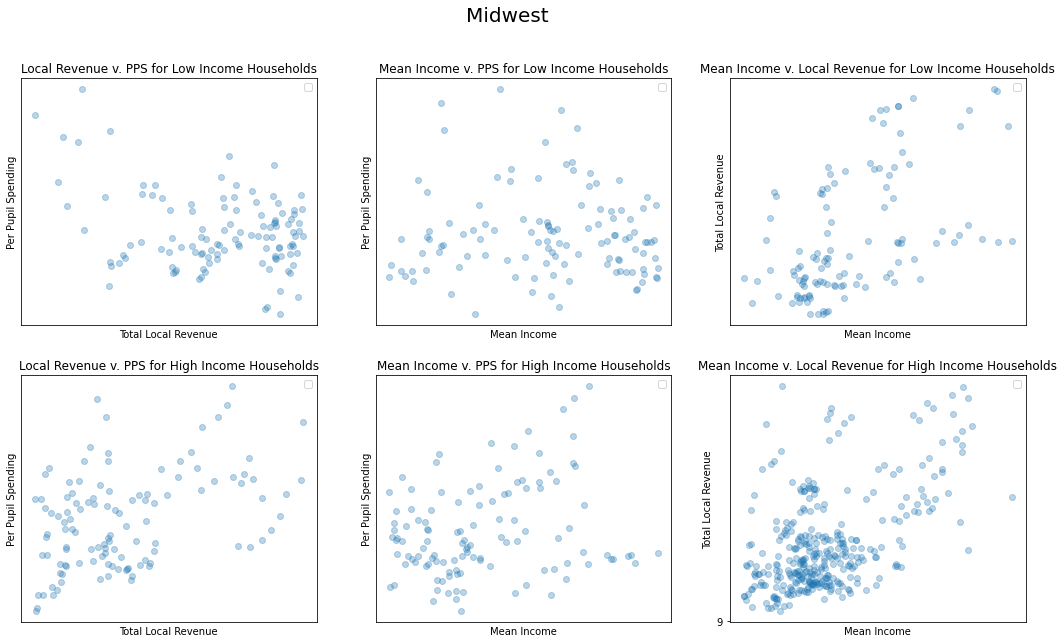

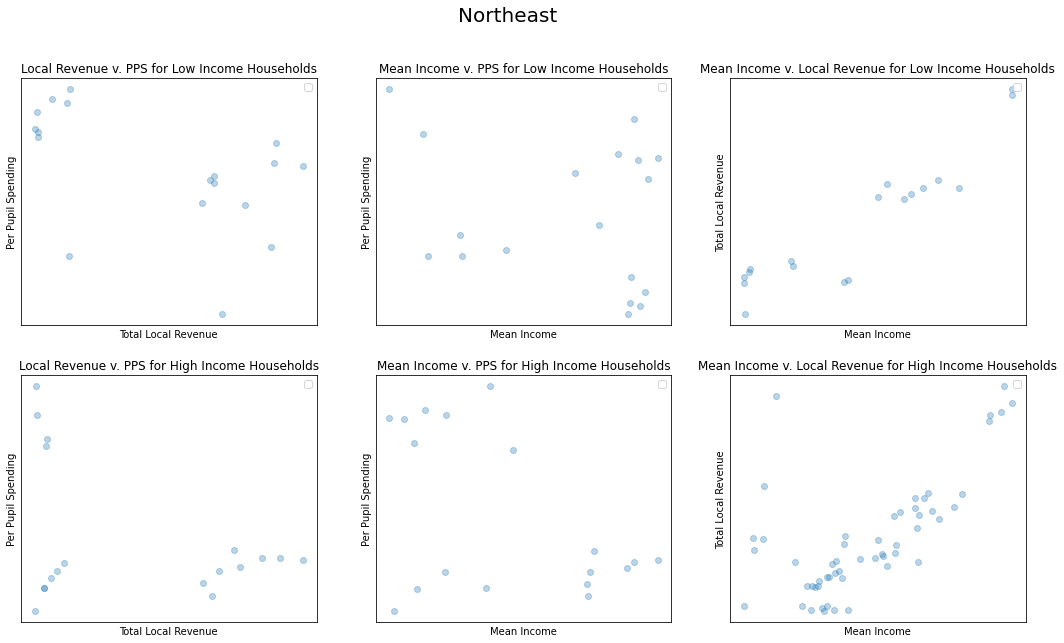

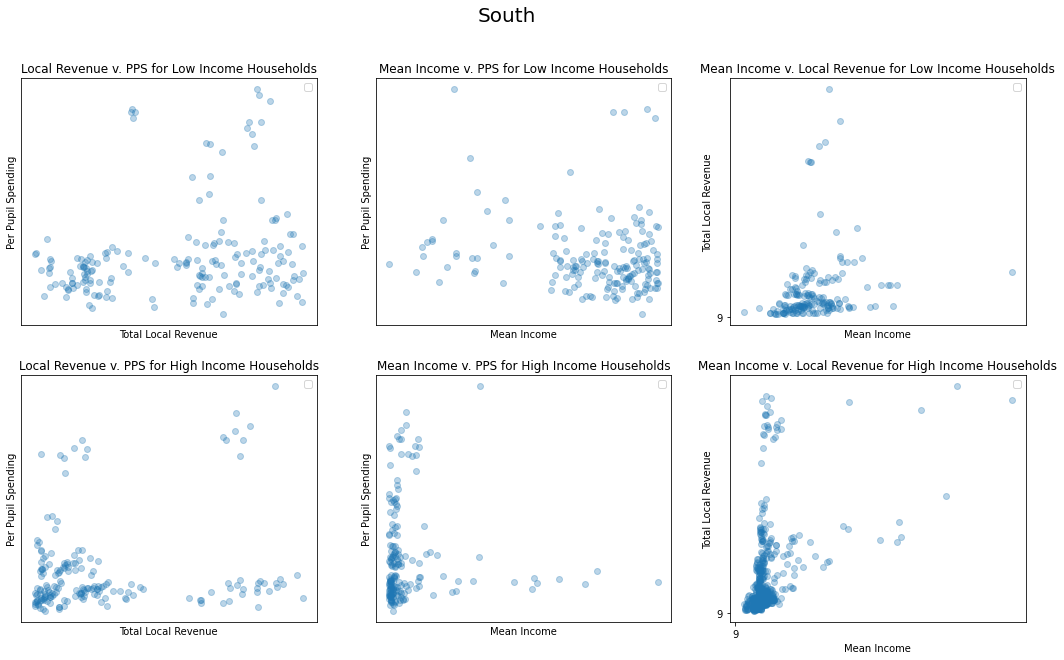

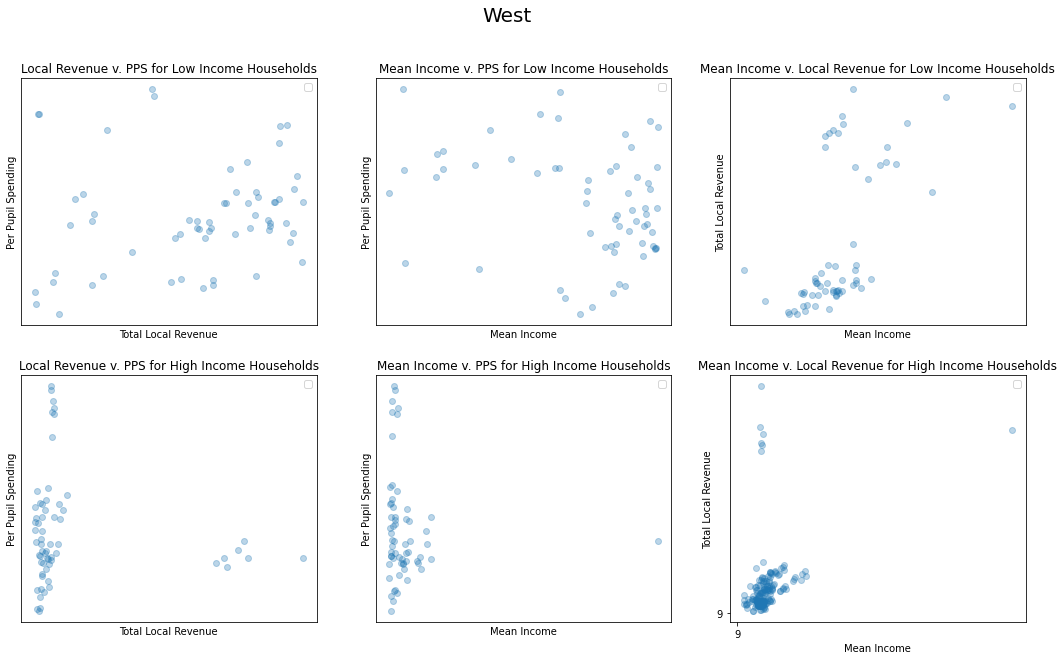

In [20]:
for name, group in region_data:
    mean_income = group['MEAN INCOME']
    min_income = math.log(math.floor(mean_income.min()))
    max_income = math.log(math.ceil(mean_income.max()))
    low_income_qtl = mean_income.quantile(q=.25)
    high_income_qtl = mean_income.quantile(q=.75)
    low_income_grp = group[mean_income < low_income_qtl]
    high_income_grp = group[mean_income > high_income_qtl]

    local_rev = group['TLOCREV']
    min_rev = math.log(math.floor(local_rev.min()))
    max_rev = math.log(math.ceil(local_rev.max()))
    low_rev_qtl = local_rev.quantile(q=.25)
    high_rev_qtl = local_rev.quantile(q=.75)
    low_rev_grp = group[local_rev < low_rev_qtl]
    high_rev_grp = group[local_rev > high_rev_qtl]
    
    per_pupil_spending = group['PPCSTOT']
    min_pps = math.log(math.floor(per_pupil_spending.min()))
    max_pps = math.log(math.ceil(per_pupil_spending.max()))
    low_pps_qtl = per_pupil_spending.quantile(q=.25)
    high_pps_qtl = per_pupil_spending.quantile(q=.75)
    low_pps_grp = group[per_pupil_spending < low_pps_qtl]
    high_pps_grp = group[per_pupil_spending > low_pps_qtl]

    fig, axes = plt.subplots(ncols=3, nrows=2)
    fig.set_size_inches(18, 10)
    fig.suptitle(name, fontsize=20)
    axes[0][0].scatter(x=low_rev_grp['TLOCREV'], y=low_rev_grp['PPCSTOT'], alpha=0.3)
    axes[0][0].set_xlabel('Total Local Revenue')
    axes[0][0].set_xticks(range(int(min_rev), int(max_rev), int(2e4)))
    axes[0][0].set_ylabel('Per Pupil Spending')
    axes[0][0].set_yticks(range(int(min_pps), int(max_pps), int(2e4)))
    axes[0][0].set_title('Local Revenue v. PPS for Low Income Households')
    axes[0][0].legend()

    axes[0][1].scatter(x=low_income_grp['MEAN INCOME'], y=low_income_grp['PPCSTOT'], alpha=0.3)
    axes[0][1].set_xlabel('Mean Income')
    axes[0][1].set_xticks(range(int(min_income), int(max_income), int(2e4)))
    axes[0][1].set_ylabel('Per Pupil Spending')
    axes[0][1].set_yticks(range(int(min_pps), int(max_pps), int(2e4)))
    axes[0][1].set_title('Mean Income v. PPS for Low Income Households')
    axes[0][1].legend()

    axes[0][2].scatter(x=low_pps_grp['MEAN INCOME'], y=low_pps_grp['TLOCREV'], alpha=0.3)
    axes[0][2].set_xlabel('Mean Income')
    axes[0][2].set_xticks(range(int(min_income), int(max_income), int(2e4)))
    axes[0][2].set_ylabel('Total Local Revenue')
    axes[0][2].set_yticks(range(int(min_rev), int(max_rev), int(2e4)))
    axes[0][2].set_title('Mean Income v. Local Revenue for Low Income Households')
    axes[0][2].legend()
    
    axes[1][0].scatter(x=high_rev_grp['TLOCREV'], y=high_rev_grp['PPCSTOT'], alpha=0.3)
    axes[1][0].set_xlabel('Total Local Revenue')
    axes[1][0].set_xticks(range(int(min_rev), int(max_rev), int(2e4)))
    axes[1][0].set_ylabel('Per Pupil Spending')
    axes[1][0].set_yticks(range(int(min_pps), int(max_pps), int(2e4)))
    axes[1][0].set_title('Local Revenue v. PPS for High Income Households')
    axes[1][0].legend()

    axes[1][1].scatter(x=high_income_grp['MEAN INCOME'], y=high_income_grp['PPCSTOT'], alpha=0.3)
    axes[1][1].set_xlabel('Mean Income')
    axes[1][1].set_xticks(range(int(min_income), int(max_income), int(2e4)))
    axes[1][1].set_ylabel('Per Pupil Spending')
    axes[1][1].set_yticks(range(int(min_pps), int(max_pps), int(2e4)))
    axes[1][1].set_title('Mean Income v. PPS for High Income Households')
    axes[1][1].legend()

    axes[1][2].scatter(x=high_pps_grp['MEAN INCOME'], y=high_pps_grp['TLOCREV'], alpha=0.3)
    axes[1][2].set_xlabel('Mean Income')
    axes[1][2].set_xticks(range(int(min_income), int(max_income), int(2e4)))
    axes[1][2].set_ylabel('Total Local Revenue')
    axes[1][2].set_yticks(range(int(min_rev), int(max_rev), int(2e4)))
    axes[1][2].set_title('Mean Income v. Local Revenue for High Income Households')
    axes[1][2].legend()

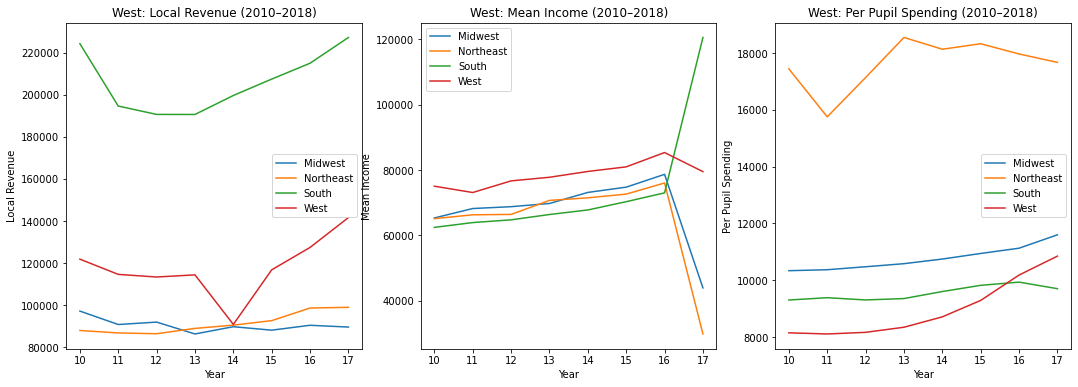

In [21]:
fig, axes = plt.subplots(ncols=3)
fig.set_size_inches(18, 6)
region_data_by_year = schlev_data.groupby(['REGION', 'YRDATA']).mean()
for region in region_data_by_year.index.levels[0]:
    year_data = region_data_by_year.xs(region)

    axes[0].plot(year_data.index.values, year_data['TLOCREV'], label=region)
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Local Revenue')
    axes[0].set_title(f'{region}: Local Revenue (2010–2018)')
    axes[0].legend()
    
    axes[1].plot(year_data.index.values, year_data['MEAN INCOME'], label=region)
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel('Mean Income')
    axes[1].set_title(f'{region}: Mean Income (2010–2018)')
    axes[1].legend()
    
    axes[2].plot(year_data.index.values, year_data['PPCSTOT'], label=region)
    axes[2].set_xlabel('Year')
    axes[2].set_ylabel('Per Pupil Spending')
    axes[2].set_title(f'{region}: Per Pupil Spending (2010–2018)')
    axes[2].legend()

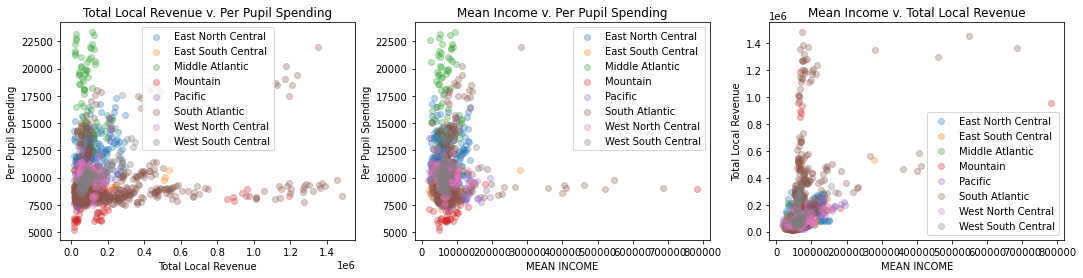

In [22]:
division_data = schlev_data.groupby(['DIVISION'])
fig, axes = plt.subplots(ncols=3)
fig.set_size_inches(18, 4)
for name, group in division_data:
    axes[0].scatter(x='TLOCREV', y='PPCSTOT', data=group, label=name, alpha=0.3)
    axes[0].set_xlabel('Total Local Revenue')
    axes[0].set_ylabel('Per Pupil Spending')
    axes[0].set_title('Total Local Revenue v. Per Pupil Spending')
    axes[0].legend()
    axes[1].scatter(x='MEAN INCOME', y='PPCSTOT', data=group, label=name, alpha=0.3)
    axes[1].set_xlabel('MEAN INCOME')
    axes[1].set_ylabel('Per Pupil Spending')
    axes[1].set_title('Mean Income v. Per Pupil Spending')
    axes[1].legend()
    axes[2].scatter(x='MEAN INCOME', y='TLOCREV', data=group, label=name, alpha=0.3)
    axes[2].set_xlabel('MEAN INCOME')
    axes[2].set_ylabel('Total Local Revenue')
    axes[2].set_title('Mean Income v. Total Local Revenue')
    axes[2].legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

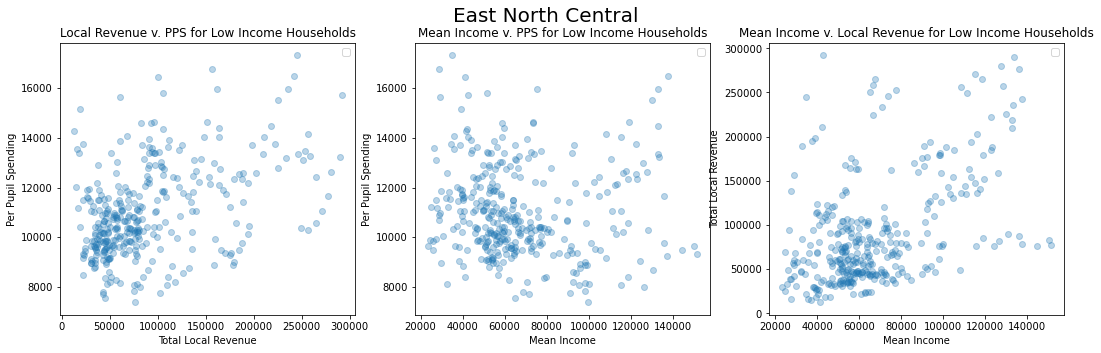

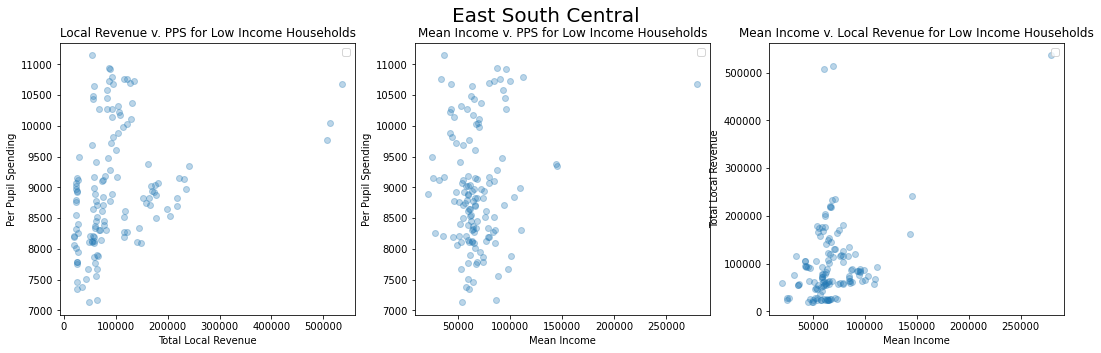

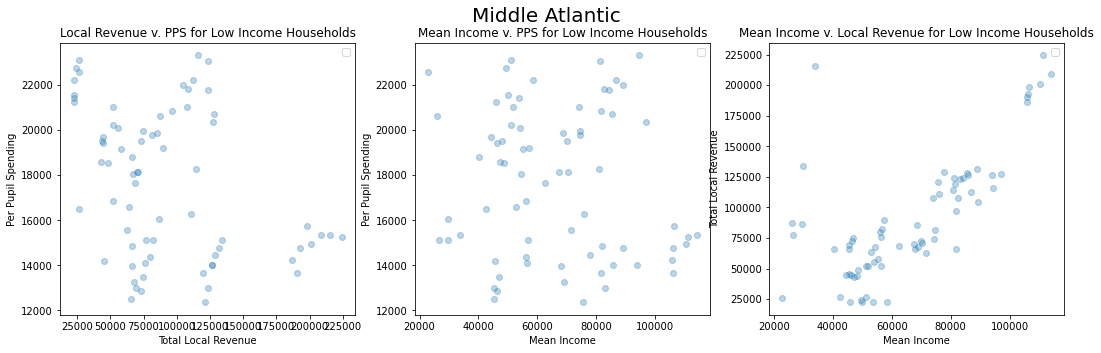

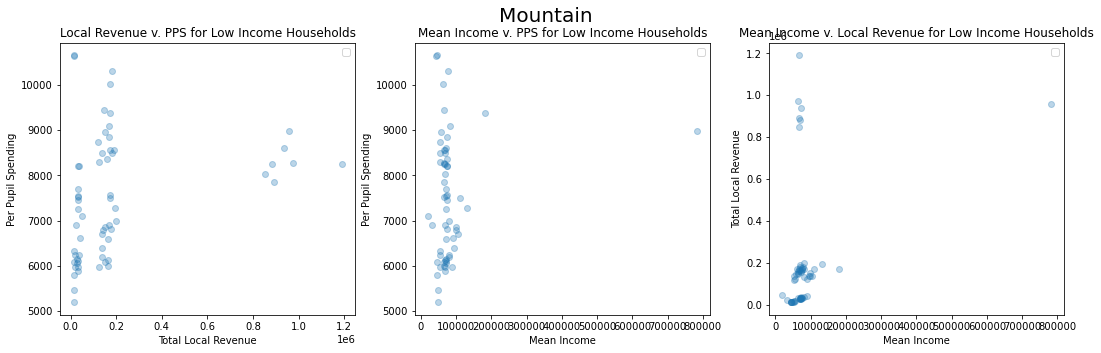

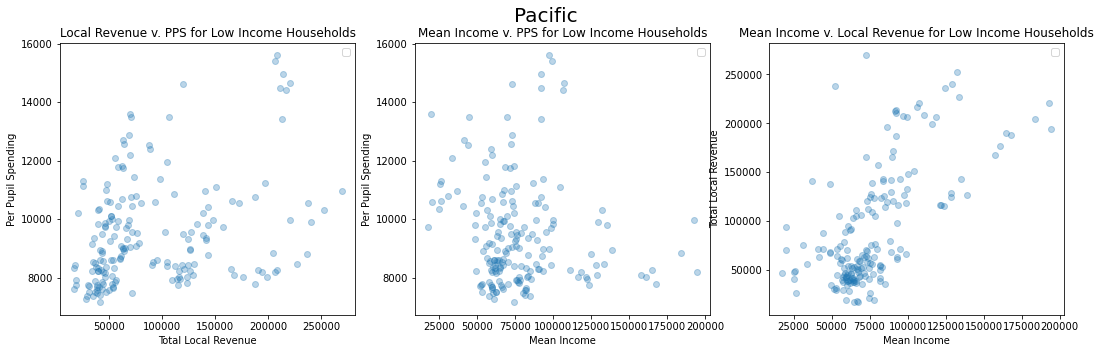

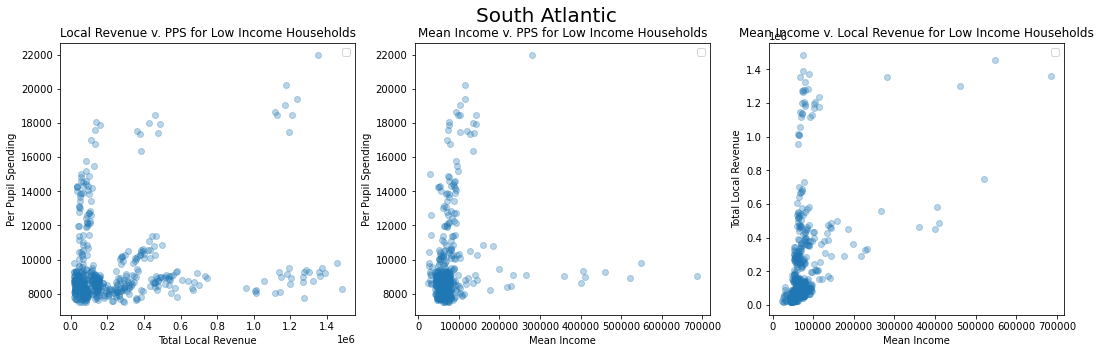

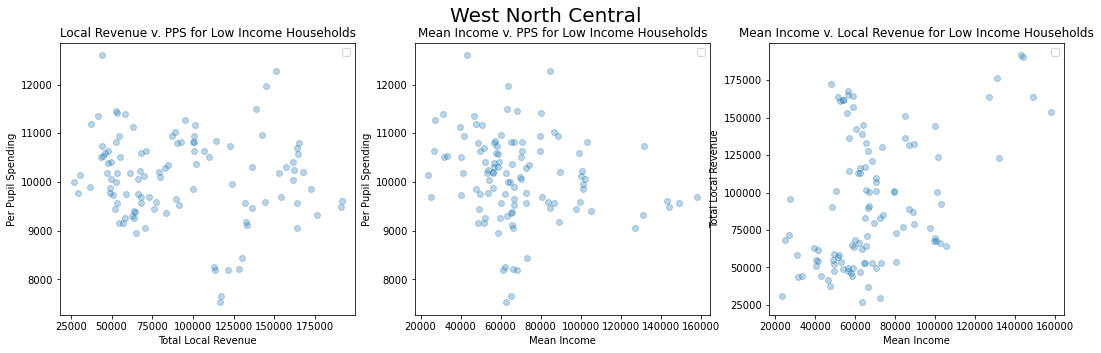

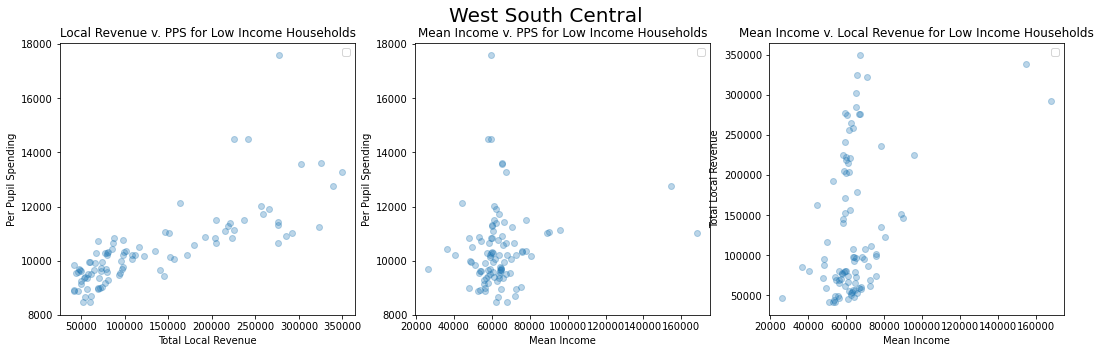

In [23]:
for name, group in division_data:
    fig, axes = plt.subplots(ncols=3, nrows=1)
    fig.set_size_inches(18, 5)
    fig.suptitle(name, fontsize=20)
    axes[0].scatter(x=group['TLOCREV'], y=group['PPCSTOT'], alpha=0.3)
    axes[0].set_xlabel('Total Local Revenue')
    axes[0].set_ylabel('Per Pupil Spending')
    axes[0].set_title('Local Revenue v. PPS for Low Income Households')
    axes[0].legend()

    axes[1].scatter(x=group['MEAN INCOME'], y=group['PPCSTOT'], alpha=0.3)
    axes[1].set_xlabel('Mean Income')
    axes[1].set_ylabel('Per Pupil Spending')
    axes[1].set_title('Mean Income v. PPS for Low Income Households')
    axes[1].legend()

    axes[2].scatter(x=group['MEAN INCOME'], y=group['TLOCREV'], alpha=0.3)
    axes[2].set_xlabel('Mean Income')
    axes[2].set_ylabel('Total Local Revenue')
    axes[2].set_title('Mean Income v. Local Revenue for Low Income Households')
    axes[2].legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

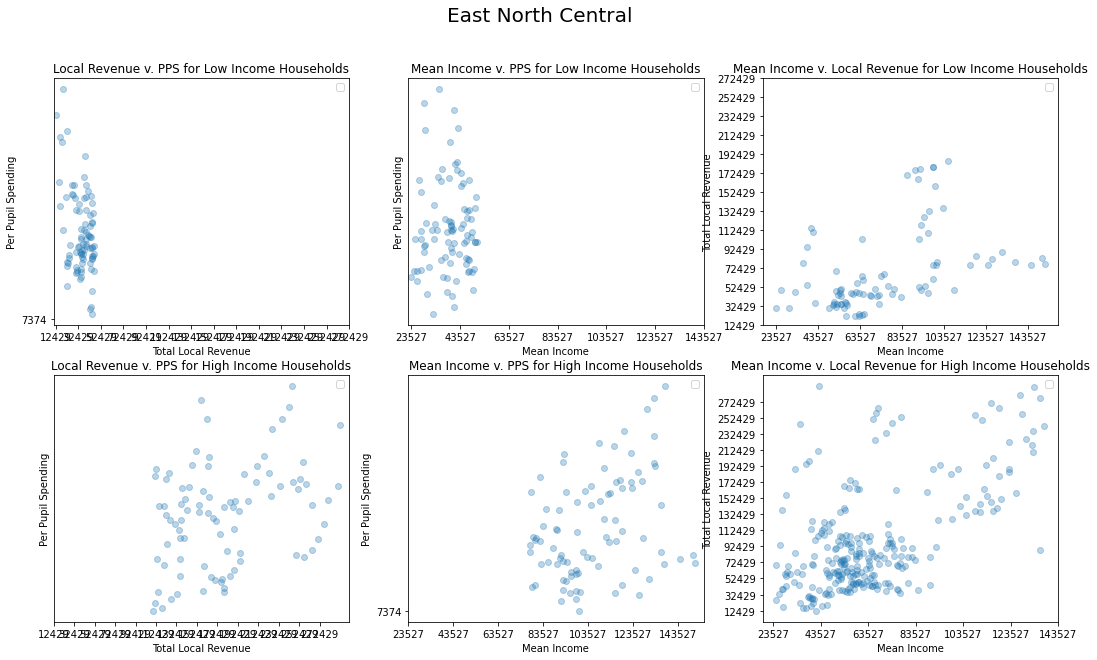

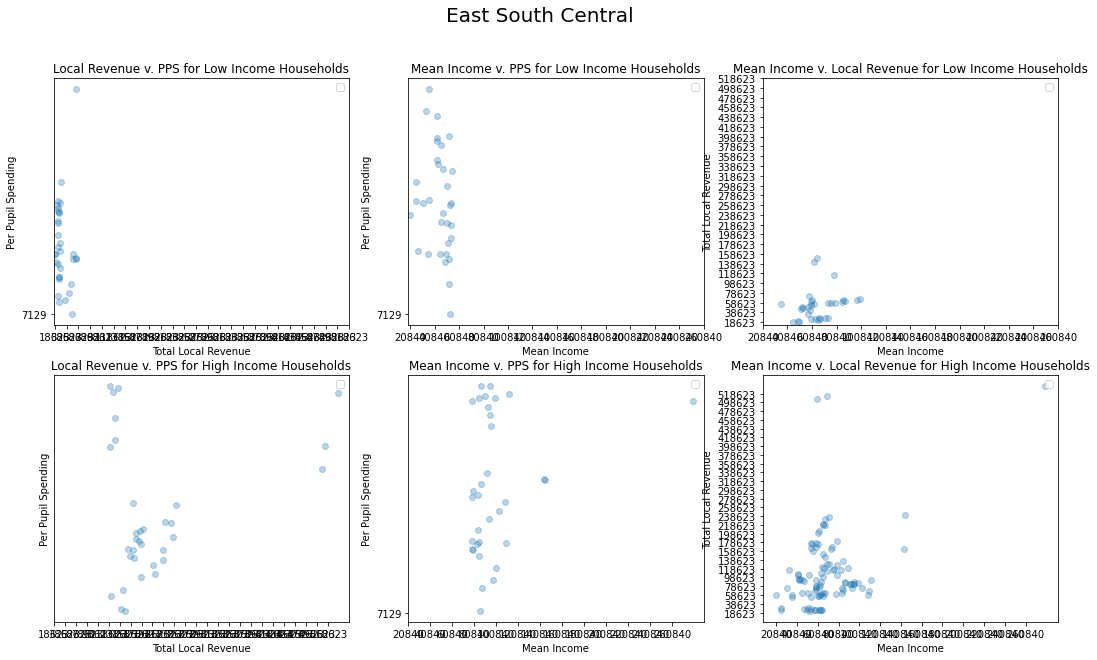

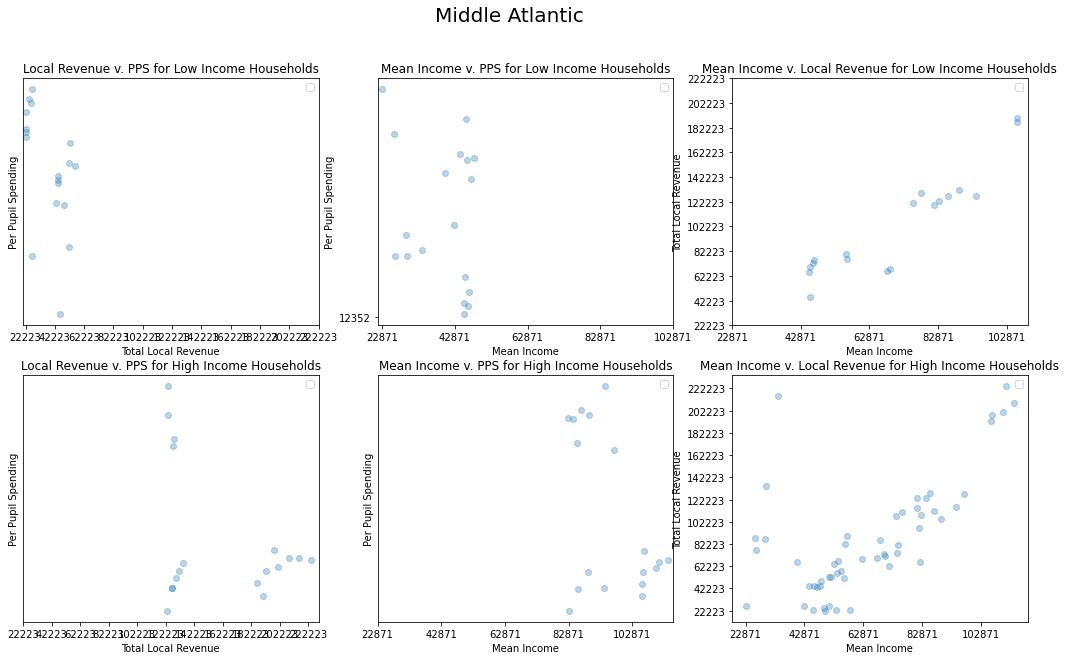

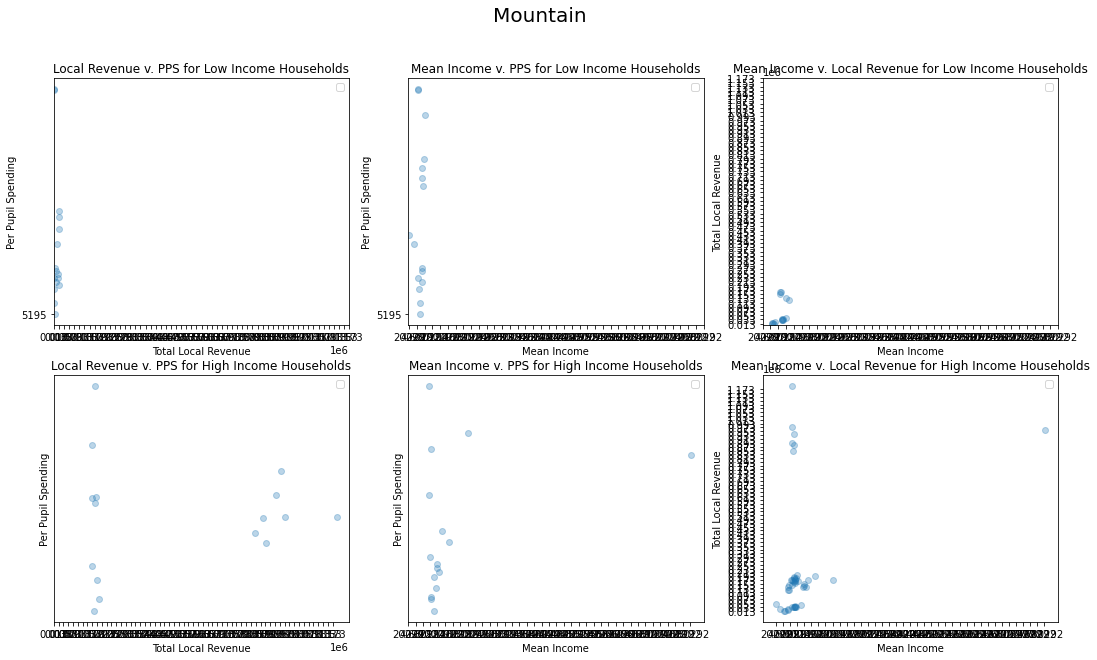

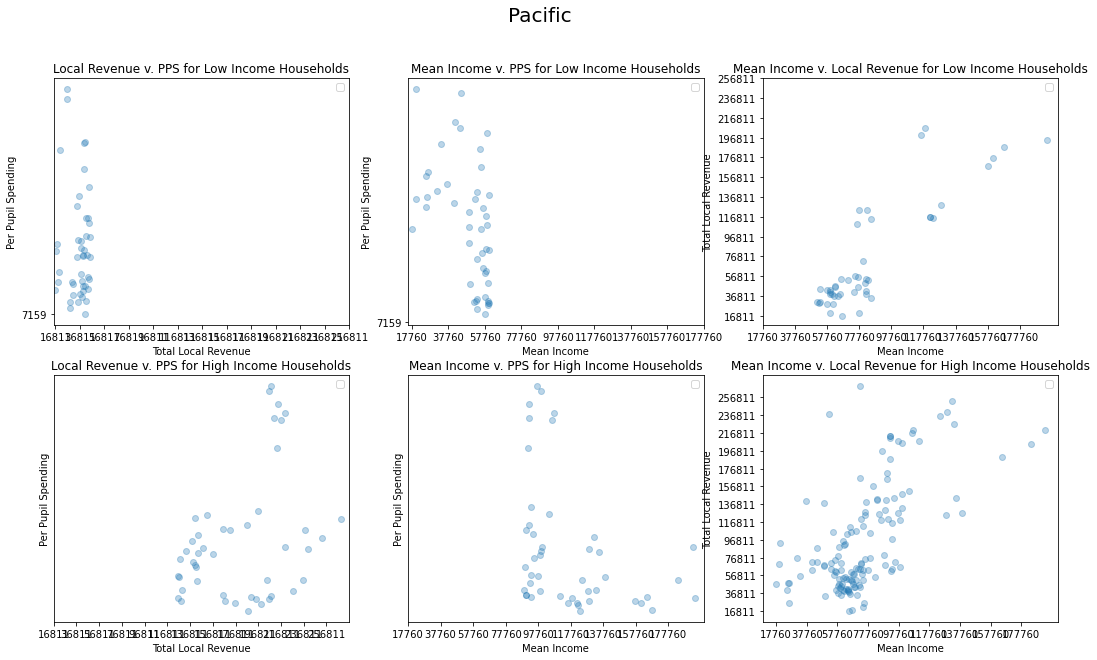

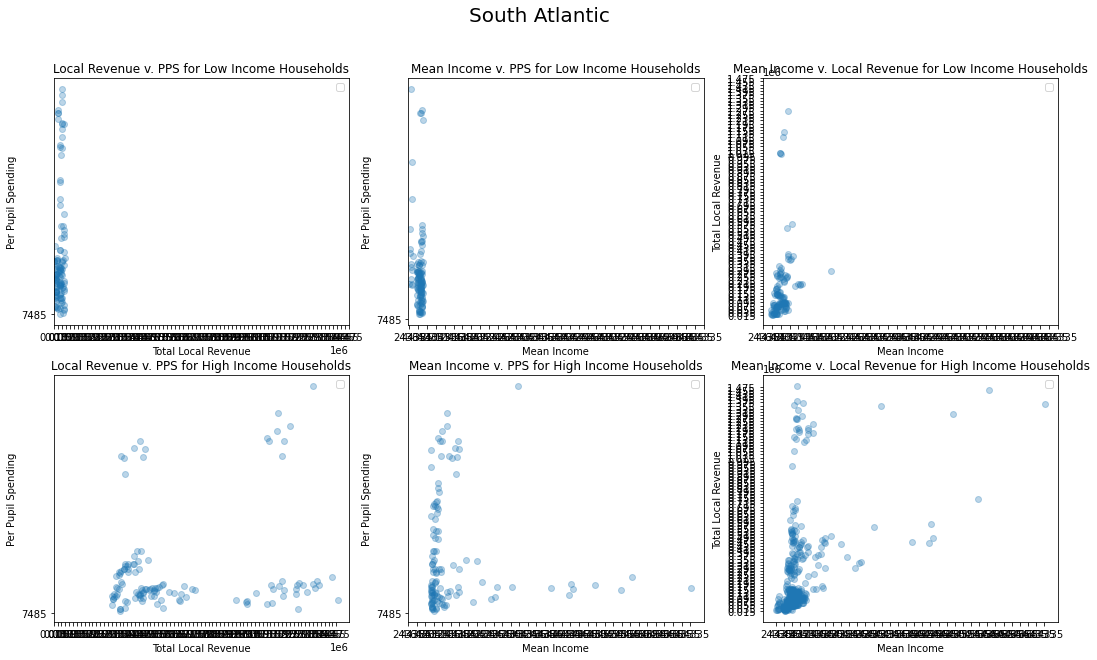

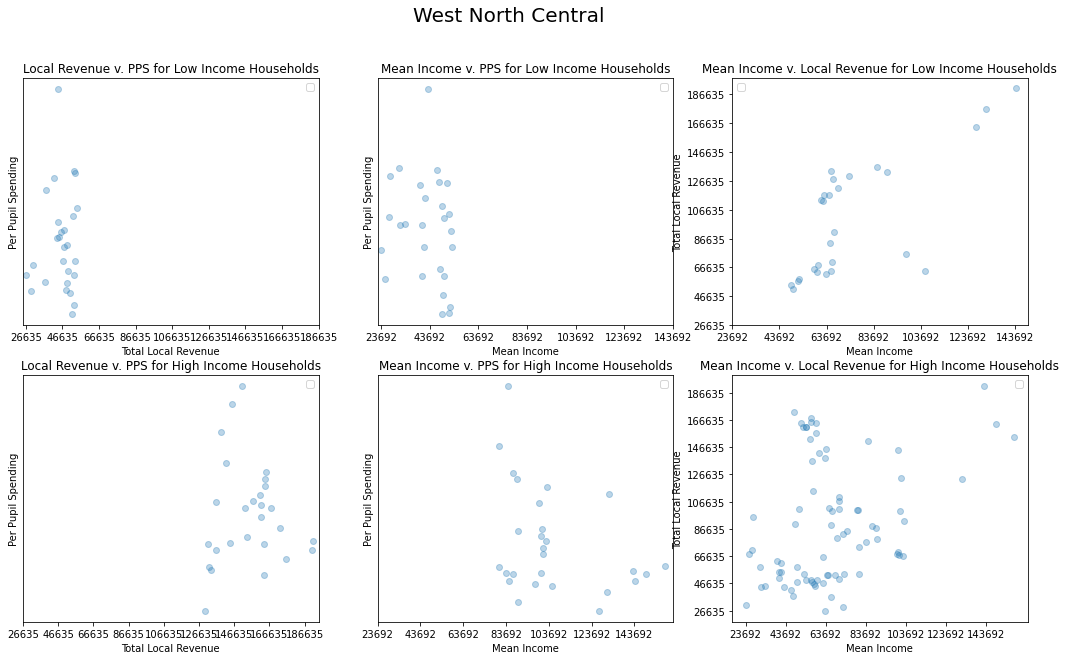

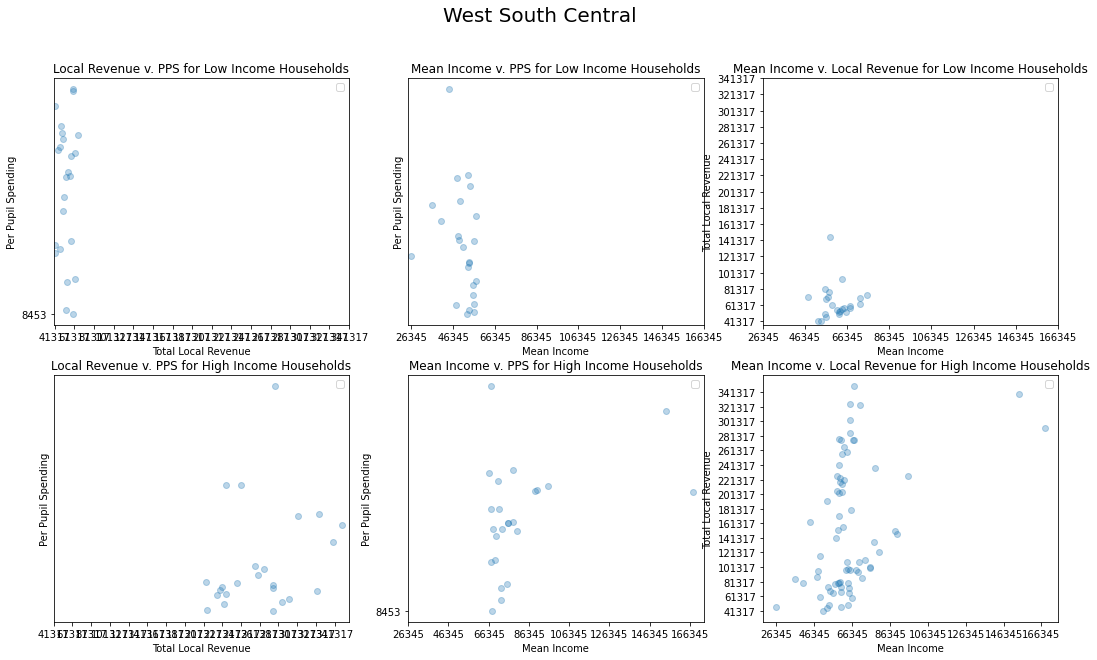

In [24]:
for name, group in division_data:
    mean_income = group['MEAN INCOME']
    min_income = mean_income.min()
    max_income = mean_income.max()
    low_income_qtl = mean_income.quantile(q=.25)
    high_income_qtl = mean_income.quantile(q=.75)
    low_income_grp = group[mean_income < low_income_qtl]
    high_income_grp = group[mean_income > high_income_qtl]

    local_rev = group['TLOCREV']
    min_rev = local_rev.min()
    max_rev = local_rev.max()
    low_rev_qtl = local_rev.quantile(q=.25)
    high_rev_qtl = local_rev.quantile(q=.75)
    low_rev_grp = group[local_rev < low_rev_qtl]
    high_rev_grp = group[local_rev > high_rev_qtl]

    per_pupil_spending = group['PPCSTOT']
    min_pps = per_pupil_spending.min()
    max_pps = per_pupil_spending.max()
    low_pps_qtl = per_pupil_spending.quantile(q=.25)
    high_pps_qtl = per_pupil_spending.quantile(q=.75)
    low_pps_grp = group[per_pupil_spending < low_pps_qtl]
    high_pps_grp = group[per_pupil_spending > low_pps_qtl]

    fig, axes = plt.subplots(ncols=3, nrows=2)
    fig.set_size_inches(18, 10)
    fig.suptitle(name, fontsize=20)
    axes[0][0].scatter(x=low_rev_grp['TLOCREV'], y=low_rev_grp['PPCSTOT'], alpha=0.3)
    axes[0][0].set_xlabel('Total Local Revenue')
    axes[0][0].set_xticks(range(int(min_rev), int(max_rev), int(2e4)))
    axes[0][0].set_ylabel('Per Pupil Spending')
    axes[0][0].set_yticks(range(int(min_pps), int(max_pps), int(2e4)))
    axes[0][0].set_title('Local Revenue v. PPS for Low Income Households')
    axes[0][0].legend()

    axes[0][1].scatter(x=low_income_grp['MEAN INCOME'], y=low_income_grp['PPCSTOT'], alpha=0.3)
    axes[0][1].set_xlabel('Mean Income')
    axes[0][1].set_xticks(range(int(min_income), int(max_income), int(2e4)))
    axes[0][1].set_ylabel('Per Pupil Spending')
    axes[0][1].set_yticks(range(int(min_pps), int(max_pps), int(2e4)))
    axes[0][1].set_title('Mean Income v. PPS for Low Income Households')
    axes[0][1].legend()

    axes[0][2].scatter(x=low_pps_grp['MEAN INCOME'], y=low_pps_grp['TLOCREV'], alpha=0.3)
    axes[0][2].set_xlabel('Mean Income')
    axes[0][2].set_xticks(range(int(min_income), int(max_income), int(2e4)))
    axes[0][2].set_ylabel('Total Local Revenue')
    axes[0][2].set_yticks(range(int(min_rev), int(max_rev), int(2e4)))
    axes[0][2].set_title('Mean Income v. Local Revenue for Low Income Households')
    axes[0][2].legend()
    
    axes[1][0].scatter(x=high_rev_grp['TLOCREV'], y=high_rev_grp['PPCSTOT'], alpha=0.3)
    axes[1][0].set_xlabel('Total Local Revenue')
    axes[1][0].set_xticks(range(int(min_rev), int(max_rev), int(2e4)))
    axes[1][0].set_ylabel('Per Pupil Spending')
    axes[1][0].set_yticks(range(int(min_pps), int(max_pps), int(2e4)))
    axes[1][0].set_title('Local Revenue v. PPS for High Income Households')
    axes[1][0].legend()

    axes[1][1].scatter(x=high_income_grp['MEAN INCOME'], y=high_income_grp['PPCSTOT'], alpha=0.3)
    axes[1][1].set_xlabel('Mean Income')
    axes[1][1].set_xticks(range(int(min_income), int(max_income), int(2e4)))
    axes[1][1].set_ylabel('Per Pupil Spending')
    axes[1][1].set_yticks(range(int(min_pps), int(max_pps), int(2e4)))
    axes[1][1].set_title('Mean Income v. PPS for High Income Households')
    axes[1][1].legend()

    axes[1][2].scatter(x=high_pps_grp['MEAN INCOME'], y=high_pps_grp['TLOCREV'], alpha=0.3)
    axes[1][2].set_xlabel('Mean Income')
    axes[1][2].set_xticks(range(int(min_income), int(max_income), int(2e4)))
    axes[1][2].set_ylabel('Total Local Revenue')
    axes[1][2].set_yticks(range(int(min_rev), int(max_rev), int(2e4)))
    axes[1][2].set_title('Mean Income v. Local Revenue for High Income Households')
    axes[1][2].legend()

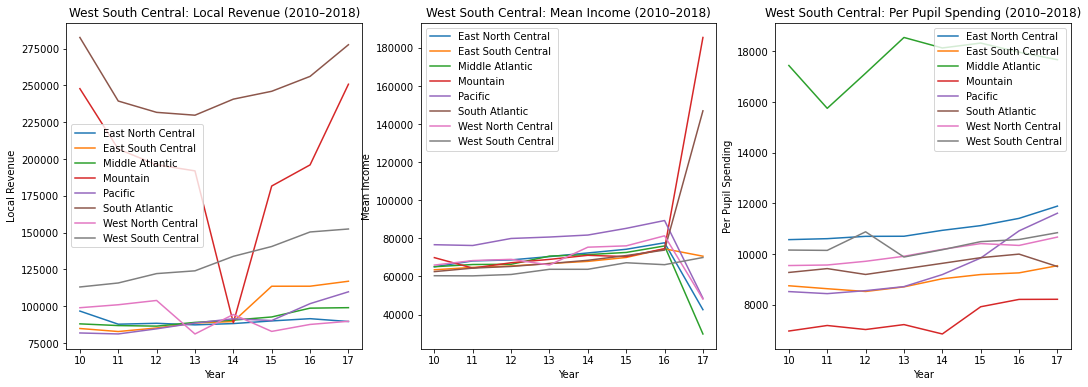

In [25]:
fig, axes = plt.subplots(ncols=3)
fig.set_size_inches(18, 6)
division_data_by_year = schlev_data.groupby(['DIVISION', 'YRDATA']).mean()
for region in division_data_by_year.index.levels[0]:
    year_data = division_data_by_year.xs(region)

    axes[0].plot(year_data.index.values, year_data['TLOCREV'], label=region)
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Local Revenue')
    axes[0].set_title(f'{region}: Local Revenue (2010–2018)')
    axes[0].legend()
    
    axes[1].plot(year_data.index.values, year_data['MEAN INCOME'], label=region)
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel('Mean Income')
    axes[1].set_title(f'{region}: Mean Income (2010–2018)')
    axes[1].legend()
    
    axes[2].plot(year_data.index.values, year_data['PPCSTOT'], label=region)
    axes[2].set_xlabel('Year')
    axes[2].set_ylabel('Per Pupil Spending')
    axes[2].set_title(f'{region}: Per Pupil Spending (2010–2018)')
    axes[2].legend()